# Theoretical Part
## Assignment 2) B-spline Basis Functions

### a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
U = [0, 1, 2, 3, 4]
t = np.linspace(0, 4, 1000)

In [9]:
N0_i = []
for u in range(len(U) - 1):
    y_i = (U[u] <= t) & (t < U[u + 1]).astype(int)
    N0_i.append(y_i)

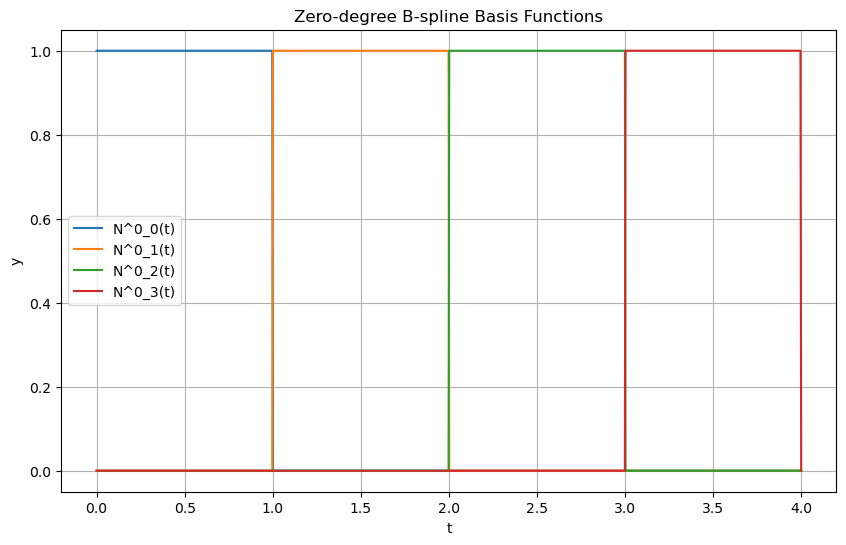

In [12]:
plt.figure(figsize=(10, 6))
for i, N in enumerate(N0_i):
    plt.plot(t, N, label=f'N^0_{i}(t)')
plt.title('Zero-degree B-spline Basis Functions')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [29]:
N1_i = []
for u in range(len(U) - 2):
    y_i = (t - U[u]) / (U[u + 1] - U[u]) * N0_i[u] + (U[u + 1 + 1] - t) / (U[u + 1 + 1] - U[u + 1]) * N0_i[u + 1]
    N1_i.append(y_i)

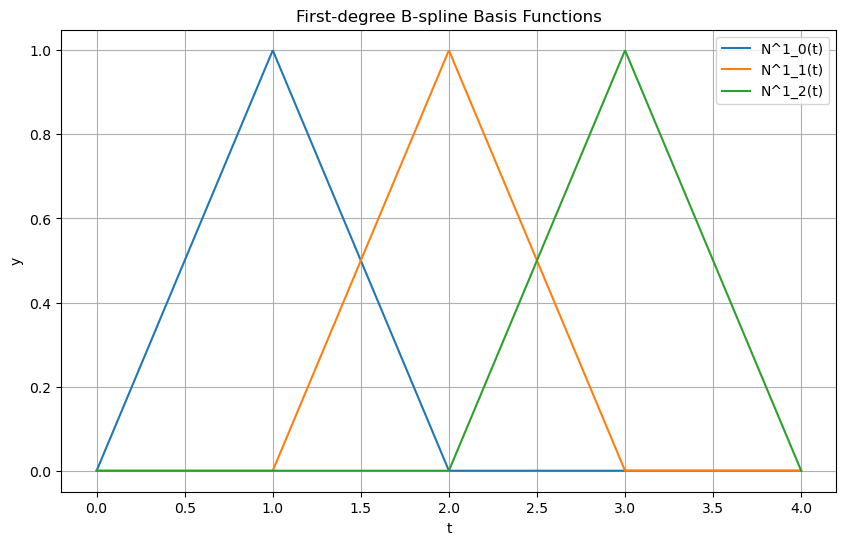

In [30]:
plt.figure(figsize=(10, 6))
for i, N in enumerate(N1_i):
    plt.plot(t, N, label=f'N^1_{i}(t)')
plt.title('First-degree B-spline Basis Functions')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [31]:
N2_i = []
for u in range(len(U) - 3):
    y_i = (t - U[u]) / (U[u + 2] - U[u]) * N1_i[u] + (U[u + 1 + 2] - t) / (U[u + 1 + 2] - U[u + 1]) * N1_i[u + 1]
    N2_i.append(y_i)

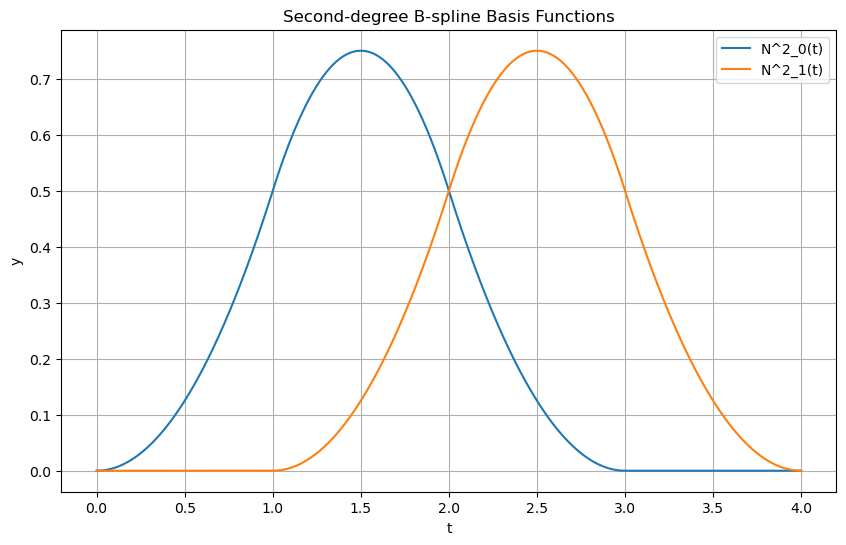

In [32]:
plt.figure(figsize=(10, 6))
for i, N in enumerate(N2_i):
    plt.plot(t, N, label=f'N^2_{i}(t)')
plt.title('Second-degree B-spline Basis Functions')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### b)

In [56]:
U = [0, 1, 2, 3, 3, 3, 4, 5, 6]
t = np.linspace(0, 6, 1000)

In [63]:
N0_i = []
for u in range(len(U) - 1):
    y_i = (U[u] <= t) & (t < U[u + 1]).astype(int)
    N0_i.append(y_i)

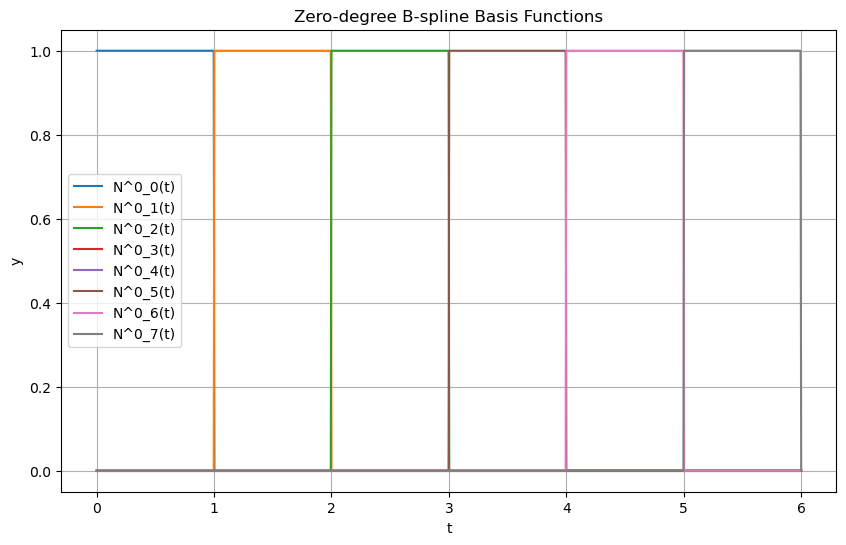

In [58]:
plt.figure(figsize=(10, 6))
for i, N in enumerate(N0_i):
    plt.plot(t, N, label=f'N^0_{i}(t)')
plt.title('Zero-degree B-spline Basis Functions')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
N1_i = []
for u in range(len(U) - 2):
    if (U[u + 1] - U[u]) == 0:
        left_term = np.zeros_like(t)
    else:
        left_term = (t - U[u]) / (U[u + 1] - U[u]) * N0_i[u]
    if (U[u + 1 + 1] - U[u + 1]) == 0:
        right_term = np.zeros_like(t)
    else:
        right_term = (U[u + 1 + 1] - t) / (U[u + 1 + 1] - U[u + 1]) * N0_i[u + 1]
    y_i = left_term + right_term
    N1_i.append(y_i)

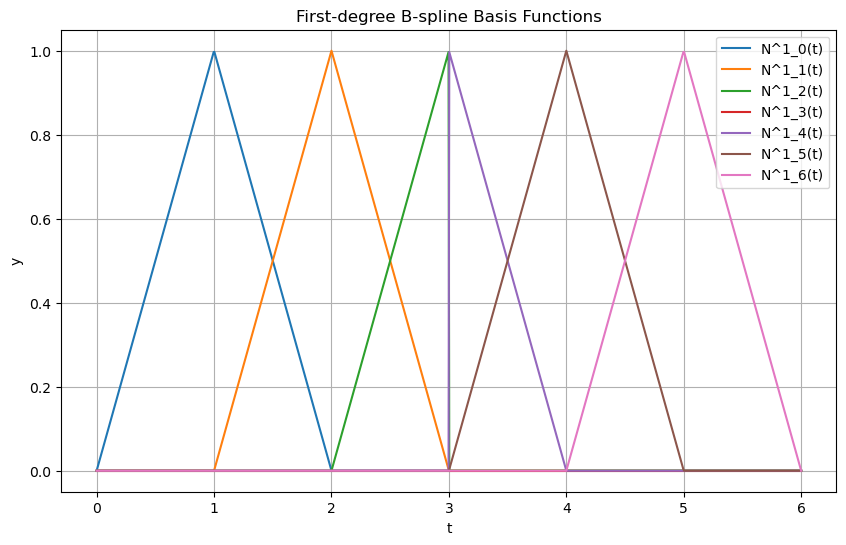

In [72]:
plt.figure(figsize=(10, 6))
for i, N in enumerate(N1_i):
    plt.plot(t, N, label=f'N^1_{i}(t)')
plt.title('First-degree B-spline Basis Functions')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [75]:
N2_i = []
for u in range(len(U) - 3):
    if (U[u + 2] - U[u]) == 0:
        left_term = np.zeros_like(t)
    else:
        left_term = (t - U[u]) / (U[u + 2] - U[u]) * N1_i[u]
    if (U[u + 1 + 2] - U[u + 1]) == 0:
        right_term = np.zeros_like(t)
    else:
        right_term = (U[u + 1 + 2] - t) / (U[u + 1 + 2] - U[u + 1]) * N1_i[u + 1]
    y_i = left_term + right_term
    N2_i.append(y_i)

    #y_i = (t - U[u]) / (U[u + 2] - U[u]) * N1_i[u] + (U[u + 1 + 2] - t) / (U[u + 1 + 2] - U[u + 1]) * N1_i[u + 1]

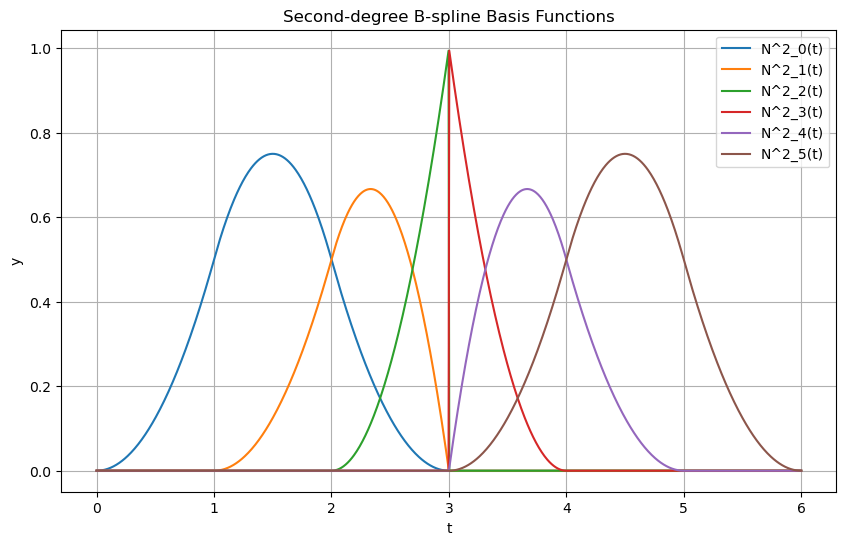

In [76]:
plt.figure(figsize=(10, 6))
for i, N in enumerate(N2_i):
    plt.plot(t, N, label=f'N^2_{i}(t)')
plt.title('Second-degree B-spline Basis Functions')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

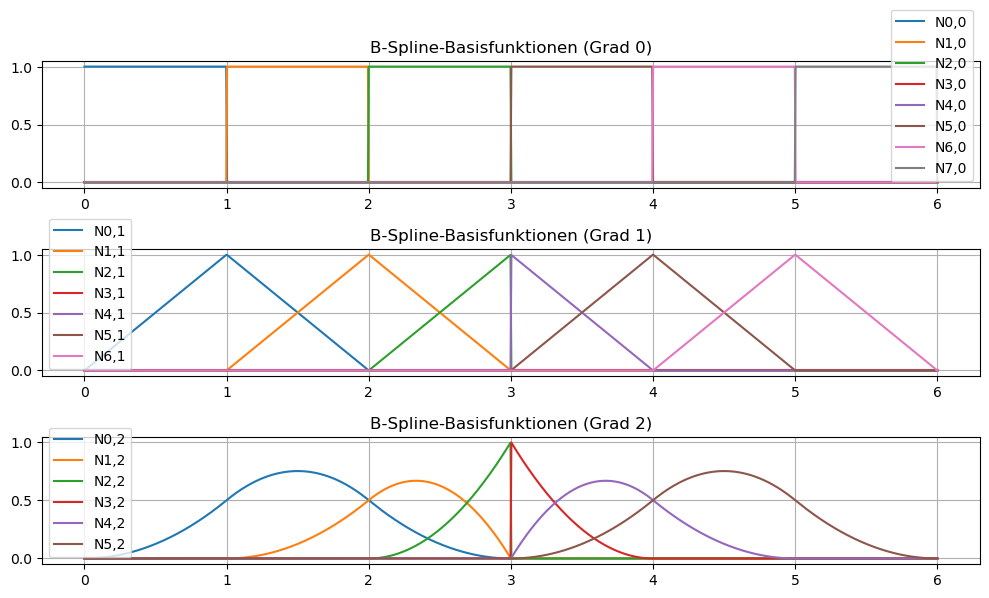

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Knotenvektor
U = np.array([0,1,2,3,3,3,4,5,6])

def N(i, p, t, U):
    """Rekursive Definition der B-Spline-Basisfunktion N_{i,p}(t)"""
    if p == 0:
        return np.where((t >= U[i]) & (t < U[i+1]), 1.0, 0.0)
    else:
        left_denom = U[i+p] - U[i]
        right_denom = U[i+p+1] - U[i+1]
        left = np.zeros_like(t) if left_denom == 0 else (t - U[i]) / left_denom * N(i, p-1, t, U)
        right = np.zeros_like(t) if right_denom == 0 else (U[i+p+1] - t) / right_denom * N(i+1, p-1, t, U)
        return left + right


t_vals = np.linspace(0, 6, 1000)

plt.figure(figsize=(10, 6))

for p in range(3):  # Grad 0, 1, 2
    n = len(U) - p - 1
    plt.subplot(3, 1, p+1)
    for i in range(n):
        Ni = N(i, p, t_vals, U)
        plt.plot(t_vals, Ni, label=f"N{i},{p}")
    plt.title(f"B-Spline-Basisfunktionen (Grad {p})")
    # plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### c)
$N_{i,0}(u) = \begin{cases}
1, & u_i \leq u < u_{i+1} \\
0,  & else
\end{cases}$

$N_{i,p}(u) = \frac{u-u_i}{u_{i+p} - u_i} \cdot N_{i,p-1}(u) + \frac{u_{i+p+1}-u}{u_{i+p+1}-u_{i+1}} \cdot N_{i+1,p-1}(u)$

$ \boxed{N_{i,p}(u) \text{ is a degree p polynomial:}}$

Induction:

Start of Induction:
$p=0: N_{i,0}(u)$ is a polynom of form $c\cdot x^0$ with $c$ beeing 1 if $u_i \leq u < u_{i+1}$ and 0 else

Induction Step:
Given that $N_{i,p-1}(u)$ and $N_{i+1,p-1}(u)$ are polynomials of degree $p=p-1$

Coefficents $a(u) = \frac{u-u_i}{u_{i+p} - u_i}$ and $b(u) = \frac{u_{i+p+1}-u}{u_{i+p+1}-u_{i+1}}$ are polynomials of degree $p=1$

If we now multiply $a(u)$ ($p=1$) with $N_{i,p-1}(u)$ ($p=p-1$) and add $b(u)$ ($p=1$) multiplied with $N_{i+1,p-1}(u)$ ($p=p-1$), we get a polynomial of degree $1 + (p-1) = p$ $\square$ 

$\boxed{\text{For all } i,p \text{ and } u \text{, } N_{i,p}(u) \text{ is non negative:}}$

Induction:
Start of Induction:
$p=0: N_{i,0}(u)$ is a either $1$ or $0 \implies$ non-negative

Induction Step:
Given that $N_{i,p-1}(u)$ and $N_{i+1,p-1}(u)$ are non-negative:

Coeffient $a(u) = \frac{u-u_i}{u_{i+p} - u_i}$ is positive because nominator $u-u_i$ and denominator $u_{i+p} - u_i$ are positive, due to definition that $u > u_i$ and $u_{i+p} > u_i$

Furthermore coeffient $b(u) = \frac{u_{i+p+1}-u}{u_{i+p+1}-u_{i+1}}$ is positive because $u_{i+p+1}-u$ is positive due to definition of $u_{i+p+1}>u$ and $u_{i+p+1}-u_{i+1}$ is positive due to $u_{i+p+1}>u_{i+1}$

So we have $\underbrace{a(u)}_{\text{positive}} \cdot \underbrace{N_{i,p-1}(u)}_{\text{positive}} + \underbrace{b(u)}_{\text{positive}} \cdot \underbrace{N_{i+1,p-1}(u)}_{\text{positive}}$ and in total that is positive again. $\square$

### d)

$\boxed{U_1 = \text{\{0, 0, 1, 1\}}:}$

$N_{0,0}(u) = 0$, $N_{1,0}(u) = 1$ for $u \in [0,1)$ and $N_{2,0}=0$

$N_{0,1}(u) = \underbrace{\frac{u-u_0}{\underbrace{u_{1} - u_0}_{/0 \implies 0}} \cdot N_{0,0}}_{0} + \frac{u_2-u}{u_{2} - u_1}\cdot N_{1,0} = \frac{1-u}{1-0}\cdot N_{1,0} = 1-u$

$N_{1,1}(u) = \frac{u-u_1}{u_{2} - u_1} \cdot N_{1,0} + \underbrace{\frac{u_3-u}{\underbrace{u_{3} - u_2}_{/0 \implies 0}}\cdot N_{2,0}}_{0} = \frac{u-0}{1-0}\cdot N_{1,0} = u$

$B_{0,1}(u) = 1\cdot u^0\cdot(1-u)^1 = 1-u = N_{0,1}(u)$

$B_{1,1}(u) = 1\cdot u^1\cdot(1-u)^0 = u = N_{1,1}(u)$

$\boxed{U_1 = \text{\{0, 0, 0, 1, 1, 1\}}:}$

$\boxed{p=0}$: $N_{0,0}(u) = 0$, $N_{1,0}(u) = 0$, $N_{2,0}(u) = 1$ for $u \in [0,1)$, $N_{3,0}=0$ and $N_{4,0}=0$

$\boxed{p=1}$:

$N_{0,1}(u) = \underbrace{\frac{u-u_0}{\underbrace{u_{1} - u_0}_{/0 \implies 0}} \cdot N_{0,0}}_{0} + \frac{u_2-u}{u_{2} - u_1}\cdot N_{1,0} = \frac{1-u}{1-0}\cdot N_{1,0} = 0$

$N_{1,1}(u) = \underbrace{\frac{u-u_1}{u_{2} - u_1} \cdot N_{1,0}}_{0} + \frac{u_3-u}{u_{3} - u_2}\cdot N_{2,0} = \frac{1-u}{1-0}\cdot N_{2,0} = 1-u$

$N_{2,1}(u) = \frac{u-u_2}{u_{3} - u_2} \cdot N_{2,0} + \underbrace{\frac{u_4-u}{u_{4} - u_3}\cdot N_{3,0}}_{0} = \frac{u-0}{1-0}\cdot N_{2,0} = u$

$N_{3,1}(u) = \underbrace{\frac{u-u_3}{u_{4} - u_3} \cdot N_{3,0}}_{0} + \underbrace{\frac{u_4-u}{u_{4} - u_3}\cdot N_{4,0}}_{0} = 0$

$\boxed{p=2}$:

$N_{0,2}(u) = \underbrace{\frac{u-u_0}{u_{2} - u_0} \cdot N_{0,1}}_{0} + \frac{u_3-u}{u_{3} - u_1}\cdot N_{1,1} = (1-u) \cdot (1-u) = (1-u)^2$

$N_{1,2}(u) = \frac{u-u_1}{u_{3} - u_1} \cdot N_{1,1} + \frac{u_4-u}{u_{4} - u_2}\cdot N_{2,1} = u \cdot(1-u) + (1-u)\cdot u = 2u(1-u)$

$N_{2,2}(u) = \frac{u-u_2}{u_{4} - u_2} \cdot N_{2,1} + \underbrace{\frac{u_5-u}{u_{5} - u_3}\cdot N_{3,1}}_{0} = u \cdot u = u^2$

$B_{0,2}(u) = \binom{2}{0}\cdot u^0\cdot(1-u)^2 = (1-u)^2 = N_{0,2}(u)$

$B_{1,2}(u) = \binom{2}{1}\cdot u^1\cdot(1-u)^1 = 2u(1-u) = N_{1,2}(u)$

$B_{2,2}(u) = \binom{2}{2}\cdot u^2\cdot(1-u)^0 = u^2 = N_{2,2}(u)$